
# Project: KPMG Dataset RFM Segmentation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#ml">Clustering</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Abstract: This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

>Source:
https://archive.ics.uci.edu/ml/datasets/online+retail#

>Task :
 - Clustering Experiments on Big Transaction Data for Market Segmentation,


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style("whitegrid")
%matplotlib inline


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading excel file of raw data
path = r"Datasets/Online Retail.xlsx"
df  = pd.read_excel(path)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


**Attribute Information**


| Column name   | Desc         |
|:------------- |:-------------| 
| InvoiceNo  | Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.    | 
|StockCode |Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.|
|Description|Product (item) name. Nominal.|
|Quantity|The quantities of each product (item) per transaction. Numeric.|
| InvoiceDate|Invoice Date and time. Numeric, the day and time when each transaction was generated. |
| UnitPrice| Unit price. Numeric, Product price per unit in sterling.|
|CustomerID |Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. |
|Country |Country name. Nominal, the name of the country where each customer resides. |



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [18]:
#Data frame size (Rows and Columns)
df.shape

(541909, 8)

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [6]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [17]:
na_ratio = df.isna().sum().sort_values(ascending = False)/len(df)
na_ratio

CustomerID     0.249267
Description    0.002683
InvoiceNo      0.000000
StockCode      0.000000
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
Country        0.000000
dtype: float64

In [9]:
df.duplicated().sum()

5268

In [10]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [12]:
df.describe(include = 'object')

,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


In [13]:
df.StockCode.value_counts()

85123A      2313
22423       2203
85099B      2159
47566       1727
20725       1639
            ... 
72793          1
90068          1
84670          1
20896          1
DCGS0073       1
Name: StockCode, Length: 4070, dtype: int64

In [14]:
df.InvoiceNo.value_counts()

573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
559943        1
559945        1
559946        1
C580768       1
C572346       1
Name: InvoiceNo, Length: 25900, dtype: int64

### The structure of your dataset

> The dataset contains 541909 observations/rows, 8 features/columns

### The main feature(s) of interest in your dataset?

> The Features that are essential for RFM (Recency, Frequency, and Monetary) customer segmentation, that are date, how many times the customers buy from customerid and how much from the invoice no.

> Also Country column is a main feature of interest for clustering


### Data Cleaning & preprocessing

- Quantity column contains negative numbers, also max and min numbers are the same
- Unit price also has negative values( will add a new column for the product of quantity and unit price for EDA)
- InvoiceNo column and StockCode should be parsed as int but the columns contain Letters like A and C(for cancellation of invoice)
- Change StockCode to category type
- The dataset contains duplicates
- about 25 % of the Customer ID column values are missing/only values which are not Null will be accounted
- Drop Description column
- Adding Longitude and Latitude from google maps dataset for each Country that would aid in clustering.
- Changing Type of the CustomerID column to be Integer instead of Float


In [4]:
#droping duplicate values
df.drop_duplicates(inplace = True)

In [5]:
#extracting Date from Invoice date instead of date time
df['Date'] = df['InvoiceDate'].dt.date

In [6]:
#Test
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01


In [26]:
df.Country.unique().tolist()

['United Kingdom',
 'France',
 'Australia',
 'Netherlands',
 'Germany',
 'Norway',
 'EIRE',
 'Switzerland',
 'Spain',
 'Poland',
 'Portugal',
 'Italy',
 'Belgium',
 'Lithuania',
 'Japan',
 'Iceland',
 'Channel Islands',
 'Denmark',
 'Cyprus',
 'Sweden',
 'Austria',
 'Israel',
 'Finland',
 'Bahrain',
 'Greece',
 'Hong Kong',
 'Singapore',
 'Lebanon',
 'United Arab Emirates',
 'Saudi Arabia',
 'Czech Republic',
 'Canada',
 'Unspecified',
 'Brazil',
 'USA',
 'European Community',
 'Malta',
 'RSA']

In [7]:
df['InVoice_month'] = df['InvoiceDate'].dt.month
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,InVoice_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,12


In [9]:
#creating a total sum column for the product of unit price and quantity 
df['Total_sum'] = df['Quantity'] * df['UnitPrice']
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,InVoice_month,Total_sum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,12,15.3


In [10]:
#Adding Log and Lat for the given df from google country dataset for clustering purposes
# Import country long/lat location from google
country_loc = pd.read_html(
    'https://developers.google.com/public-data/docs/canonical/countries_csv', header=0)

# Convert data to df
country_loc_df = pd.DataFrame(data=country_loc[0])


In [11]:
country_loc_df

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
...,...,...,...,...
240,YE,15.552727,48.516388,Yemen
241,YT,-12.827500,45.166244,Mayotte
242,ZA,-30.559482,22.937506,South Africa
243,ZM,-13.133897,27.849332,Zambia


In [12]:
# Drop country abbreviation
country_loc_df.drop(['country'], axis=1, inplace=True)

# Rename index column
country_loc_df.rename(index=str, columns={'name':'Country'}, inplace=True)

country_loc_df.head(1)

,latitude,longitude,Country
0,42.546245,1.601554,Andorra


In [13]:
# Replace countries with correct labels
df.loc[df['Country'] == 'EIRE', 'Country'] = 'Ireland'
df.loc[df['Country'] == 'RSA', 'Country'] = 'South Africa'
df.loc[df['Country'] == 'USA', 'Country'] = 'United States'
df.loc[df['Country'] == 'European Community', 'Country'] = 'France'
df.loc[df['Country'] == 'Channel Islands', 'Country'] = 'Jersey'
df.loc[df['Country'] == 'Unspecified', 'Country'] = 'United Kingdom'


# Combine data together
df = df.merge(country_loc_df, on=['Country', 'Country'])

# Convert country to categorical dtype
df['Country'] = df.Country.astype('category')

In [50]:
#Test
df['Country'].unique().tolist()

['United Kingdom',
 'France',
 'Australia',
 'Netherlands',
 'Germany',
 'Norway',
 'Ireland',
 'Switzerland',
 'Spain',
 'Poland',
 'Portugal',
 'Italy',
 'Belgium',
 'Lithuania',
 'Japan',
 'Iceland',
 'Jersey',
 'Denmark',
 'Cyprus',
 'Sweden',
 'Austria',
 'Israel',
 'Finland',
 'Bahrain',
 'Greece',
 'Hong Kong',
 'Singapore',
 'Lebanon',
 'United Arab Emirates',
 'Saudi Arabia',
 'Czech Republic',
 'Canada',
 'Brazil',
 'United States',
 'Malta',
 'South Africa']

In [14]:
# offsitting the rows where Customer Id is Null
df = df[pd.notnull(df['CustomerID'])]
df.describe()

,Quantity,UnitPrice,CustomerID,InVoice_month,Total_sum,latitude,longitude
count,401604.000000,401604.000000,401604.000000,401604.000000,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818,7.595407,20.613638,54.397612,-2.137700
std,250.283037,69.764035,1714.006089,3.417451,430.352218,5.518008,10.373150
min,-80995.000000,0.000000,12346.000000,1.000000,-168469.600000,-30.559482,-106.346771
25%,2.000000,1.250000,13939.000000,5.000000,4.250000,55.378051,-3.435973
50%,5.000000,1.950000,15145.000000,8.000000,11.700000,55.378051,-3.435973
75%,12.000000,3.750000,16784.000000,11.000000,19.800000,55.378051,-3.435973
max,80995.000000,38970.000000,18287.000000,12.000000,168469.600000,64.963051,138.252924


In [16]:
# offsitting Negative values of the Total_sum Column
df = df.loc[df['Total_sum']> 0]
df.describe()

,Quantity,UnitPrice,CustomerID,InVoice_month,Total_sum,latitude,longitude
count,392692.000000,392692.000000,392692.000000,392692.000000,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865,7.601871,22.631500,54.415770,-2.148000
std,180.492832,22.241836,1713.539549,3.415015,311.099224,5.437055,10.073138
min,1.000000,0.001000,12346.000000,1.000000,0.001000,-30.559482,-106.346771
25%,2.000000,1.250000,13955.000000,5.000000,4.950000,55.378051,-3.435973
50%,6.000000,1.950000,15150.000000,8.000000,12.450000,55.378051,-3.435973
75%,12.000000,3.750000,16791.000000,11.000000,19.800000,55.378051,-3.435973
max,80995.000000,8142.750000,18287.000000,12.000000,168469.600000,64.963051,138.252924


In [17]:
#Changing Type of the CustomerID column to be Integer instead of Float
df['CustomerID'] = df['CustomerID'].astype('int')

In [18]:
df['StockCode'] = df.StockCode.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 536639
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      392692 non-null  object        
 1   StockCode      392692 non-null  category      
 2   Description    392692 non-null  object        
 3   Quantity       392692 non-null  int64         
 4   InvoiceDate    392692 non-null  datetime64[ns]
 5   UnitPrice      392692 non-null  float64       
 6   CustomerID     392692 non-null  int32         
 7   Country        392692 non-null  category      
 8   Date           392692 non-null  object        
 9   InVoice_month  392692 non-null  int64         
 10  Total_sum      392692 non-null  float64       
 11  latitude       392692 non-null  float64       
 12  longitude      392692 non-null  float64       
dtypes: category(2), datetime64[ns](1), float64(4), int32(1), int64(2), object(3)
memory usage: 35.7+ MB


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 
- which month has a Sales surge? 
- which country has the highest sales?
- Most Frequent unique Customers' id?
- Customer Ids with the highest purchases?

## Univariate Exploration


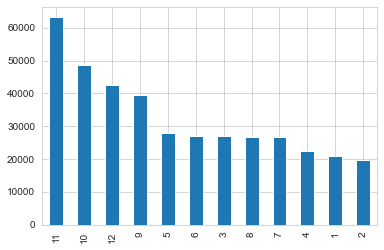

In [19]:
df.InVoice_month.value_counts().plot(kind = 'bar')
plt.xlabel('Month')
plt.ylabel('Number of purchases');

> Months 10,11,12 have the highest number of purchases because of the holidays

''

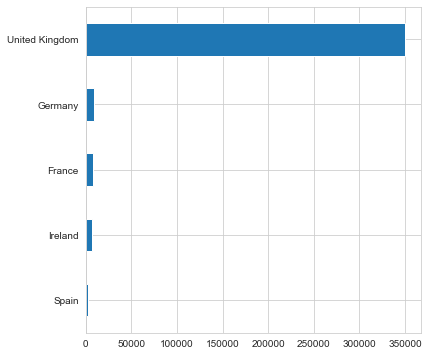

In [155]:
#Top countries in terms of sales
df.Country.value_counts(ascending=False)[:5].plot(kind = 'barh', figsize= (6,6))
plt.gca().invert_yaxis();

> Given that its a UK store, the highest purchases were from the UK then some countries in Europe

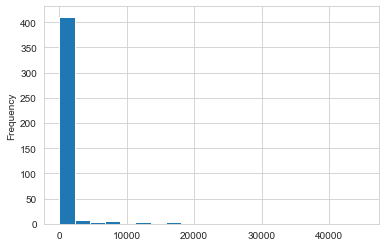

In [161]:
df.UnitPrice.value_counts().plot(kind ='hist', bins = 20);

In [35]:
df.UnitPrice.value_counts()[:15]

1.25     45102
1.65     36286
2.95     26151
0.85     25658
0.42     21557
         ...  
3.45       290
0.63       280
1.04       262
3.35       253
15.00      232
Name: UnitPrice, Length: 72, dtype: int64

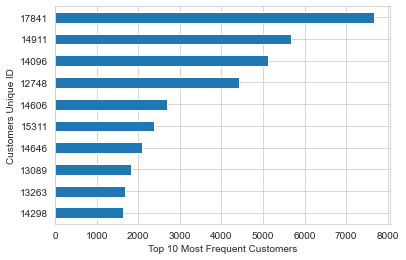

In [21]:
#10 Most Frequent Customers
df.CustomerID.value_counts(ascending=False)[:10].plot(kind = 'barh')
plt.gca().invert_yaxis()
plt.xlabel('Top 10 Most Frequent Customers')
plt.ylabel('Customers Unique ID');

## Bivariate Exploration & Multivariate Exploration


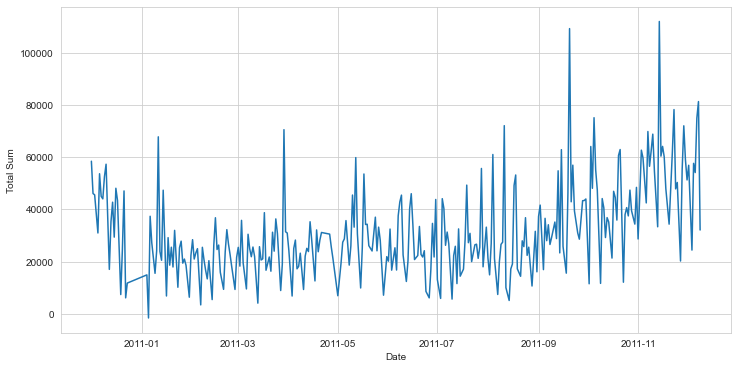

In [41]:
#Plotting total Sales by month
df.groupby('Date')['Total_sum'].sum().plot(figsize = (12,6))
plt.ylabel('Total Sales');

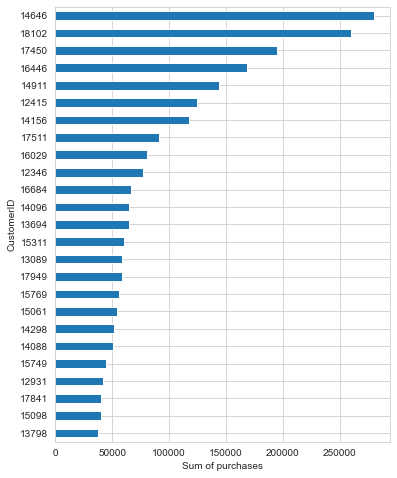

In [196]:
#Customer Ids with the highest purchases
group= df.groupby('CustomerID')['Total_sum'].sum().sort_values(ascending = False)
group[:25].plot(kind ='barh', figsize =(6,8))
plt.gca().invert_yaxis()
plt.xlabel('Sum of purchases');

In [202]:
#checking the count of transactions for the highest paying customers
df.groupby('CustomerID')['Total_sum'].agg(['sum','count']).sort_values(by='sum',ascending = False)

,sum,count
CustomerID,,
14646,280206.02,2076
18102,259657.30,431
17450,194390.79,336
16446,168472.50,3
14911,143711.17,5670
...,...,...
16878,13.30,3
17956,12.75,1
16454,6.90,2


## RFM (Recency, Frequency, and Monetary) customer segmentation:

1.	Extract most recent 1-year transactions data.
2.	Calculate the Recency of each customer by their latest transaction date.
3.	Calculate the Frequency of each customer by summing the number of invoices tagged to each customer.
4.	Calculate the Monetary Value of each customer by summing up their respective total spend.

In [22]:
import datetime as dt
#Calculat year date range from latest data

end_date = df['Date'].max()


# Filter 1-year data range from original df
start_date = end_date -pd.to_timedelta(364, unit='d')
df_rfm = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]


# Create hypothetical snapshot date
snapshot_date = end_date + dt.timedelta(days=1)


# Calculate Recency, Frequency and Monetary value for each customer
df_rfm = df_rfm.groupby(['CustomerID']).agg({
    'Date': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'Total_sum': 'sum'})


# Rename the columns
df_rfm.rename(columns={'Date': 'Recency',
                       'InvoiceNo': 'Frequency',
                       'Total_sum': 'MonetaryValue'}, inplace=True)


In [23]:
df_rfm.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346,326,1,77183.60
12347,3,151,3598.21
12348,76,31,1797.24
12349,19,73,1757.55
12350,311,17,334.40


In [24]:
#reducing Skewness of variables
from scipy import stats
def check_skew(df, column):
    skew = stats.skew(df[column])
    skewtest = stats.skewtest(df[column])
    plt.title('Distribution of ' + column)
    sb.distplot(df[column])
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

Recency's: Skew: 1.2366484066332477, : SkewtestResult(statistic=26.248158792893136, pvalue=7.502082939907587e-152)
Frequency's: Skew: 18.017332957746806, : SkewtestResult(statistic=82.74998788801516, pvalue=0.0)
MonetaryValue's: Skew: 19.0683093639848, : SkewtestResult(statistic=83.98821712435034, pvalue=0.0)


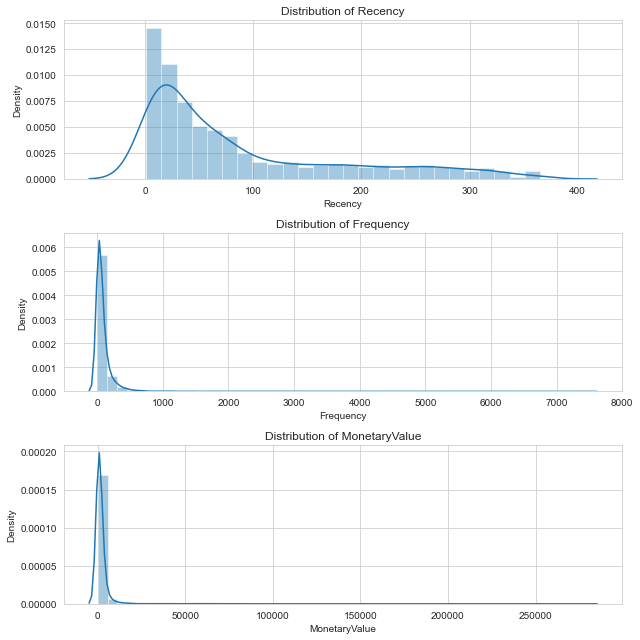

In [25]:
# Plot all 3 graphs together for summary findings
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(df_rfm,'Recency')

plt.subplot(3, 1, 2)
check_skew(df_rfm,'Frequency')

plt.subplot(3, 1, 3)
check_skew(df_rfm,'MonetaryValue')

plt.tight_layout();

In [214]:
df_rfm.describe()

,Recency,Frequency,MonetaryValue
count,4264.000000,4264.000000,4264.000000
mean,88.241792,88.768293,2011.386614
std,93.888162,220.815601,8780.849894
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,303.045000
50%,50.000000,40.000000,660.660000
75%,134.000000,97.000000,1636.362500
max,365.000000,7491.000000,280206.020000


Recency's: Skew: -0.4764003819497673, : SkewtestResult(statistic=-12.09566850894663, pvalue=1.1133227060340995e-33)
Frequency's: Skew: -0.21887665697673916, : SkewtestResult(statistic=-5.777617999209057, pvalue=7.576558411968531e-09)
MonetaryValue's: Skew: 0.38462622541127395, : SkewtestResult(statistic=9.926808098046033, pvalue=3.182810809046833e-23)


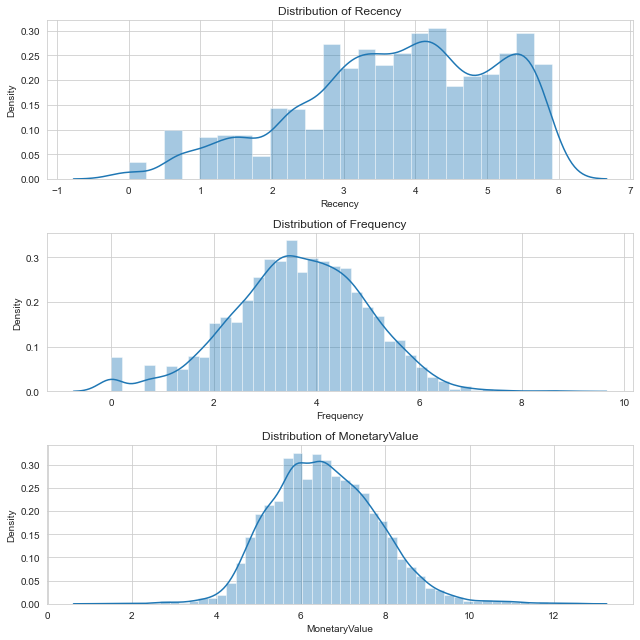

In [26]:
# Transform skewed data with log tranasformation
df_rfm_log = np.log(df_rfm)

# Check for skewness after log transformation
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(df_rfm_log,'Recency')

plt.subplot(3, 1, 2)
check_skew(df_rfm_log,'Frequency')

plt.subplot(3, 1, 3)
check_skew(df_rfm_log,'MonetaryValue')

plt.tight_layout()

<a id="ml"></a>

## Clustering

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

In [28]:
# Scaling data
scaler = StandardScaler()
scaler.fit(df_rfm_log)
df_rfm_normal = scaler.transform(df_rfm_log)

df_rfm_normal = pd.DataFrame(df_rfm_normal, index=df_rfm_log.index, columns=df_rfm_log.columns)

# Check result after standardising
df_rfm_normal.describe().round(3)

,Recency,Frequency,MonetaryValue
count,4264.000,4264.000,4264.000
mean,0.000,0.000,-0.000
std,1.000,1.000,1.000
min,-2.754,-2.792,-4.179
25%,-0.639,-0.631,-0.684
50%,0.108,0.021,-0.064
75%,0.829,0.697,0.658
max,1.562,4.012,4.749


In [29]:
#finding the Optimal no of clusters
def optimal_kmeans(dataset, start=2, end=11):
    '''
    Calculate the optimal number of kmeans
    
    INPUT:
        dataset : dataframe. Dataset for k-means to fit
        start : int. Starting range of kmeans to test
        end : int. Ending range of kmeans to test
    OUTPUT:
        Values of Inertia and Silhouette Score.
        Lineplot of values of Inertia and Silhouette Score.
    '''
    
    # Create empty lists to store values for plotting graphs
    n_clu = []
    km_ss = []
    inertia = []

    # Create a for loop to find optimal n_clusters
    for n_clusters in range(start, end):

        # Create cluster labels
        kmeans = KMeans(n_clusters=n_clusters)
        labels = kmeans.fit_predict(dataset)

        # Calcualte model performance
        silhouette_avg = round(silhouette_score(dataset, labels, random_state=1), 3)
        inertia_score = round(kmeans.inertia_, 2)

        # Append score to lists
        km_ss.append(silhouette_avg)
        n_clu.append(n_clusters)
        inertia.append(inertia_score)

        print("No. Clusters: {}, Silhouette Score(SS): {}, SS Delta: {}, Inertia: {}, Inertia Delta: {}".format(
            n_clusters, 
            silhouette_avg, 
            (km_ss[n_clusters - start] - km_ss[n_clusters - start - 1]), 
            inertia_score, 
            (inertia[n_clusters - start] - inertia[n_clusters - start - 1])))

        # Plot graph at the end of loop
        if n_clusters == end - 1:
            plt.figure(figsize=(9,6))

            plt.subplot(2, 1, 1)
            plt.title('Within-Cluster Sum-of-Squares / Inertia')
            sb.pointplot(x=n_clu, y=inertia)

            plt.subplot(2, 1, 2)
            plt.title('Silhouette Score')
            sb.pointplot(x=n_clu, y=km_ss)
            plt.tight_layout()
            plt.show()

No. Clusters: 2, Silhouette Score(SS): 0.394, SS Delta: 0.0, Inertia: 6777.51, Inertia Delta: 0.0
No. Clusters: 3, Silhouette Score(SS): 0.298, SS Delta: -0.09600000000000003, Inertia: 5257.9, Inertia Delta: -1519.6100000000006
No. Clusters: 4, Silhouette Score(SS): 0.304, SS Delta: 0.006000000000000005, Inertia: 4355.86, Inertia Delta: -902.04
No. Clusters: 5, Silhouette Score(SS): 0.279, SS Delta: -0.024999999999999967, Inertia: 3697.2, Inertia Delta: -658.6599999999999
No. Clusters: 6, Silhouette Score(SS): 0.274, SS Delta: -0.0050000000000000044, Inertia: 3302.49, Inertia Delta: -394.71000000000004
No. Clusters: 7, Silhouette Score(SS): 0.265, SS Delta: -0.009000000000000008, Inertia: 2990.13, Inertia Delta: -312.3599999999997
No. Clusters: 8, Silhouette Score(SS): 0.259, SS Delta: -0.006000000000000005, Inertia: 2755.11, Inertia Delta: -235.01999999999998
No. Clusters: 9, Silhouette Score(SS): 0.258, SS Delta: -0.0010000000000000009, Inertia: 2577.32, Inertia Delta: -177.789999999

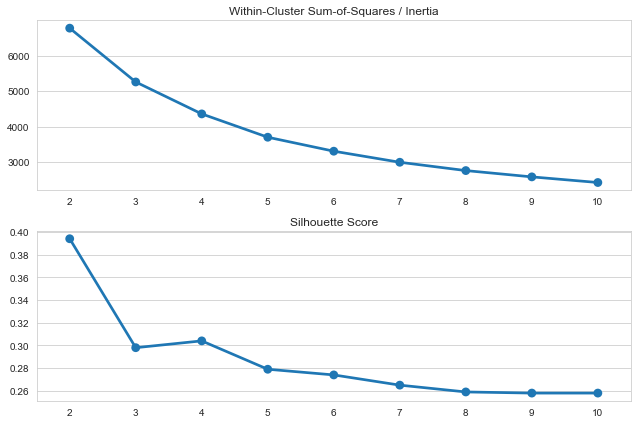

In [223]:
optimal_kmeans(df_rfm_normal)

> Based on the inertia and silhouette score, the optimal number of cluster is 3. 

In [32]:
#Implementin K-means clustering
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):
    '''
    Implement k-means clustering on dataset
    
    INPUT:
        normalised_df_rfm : dataframe. Normalised rfm dataset for k-means to fit.
        clusters_number : int. Number of clusters to form.
        original_df_rfm : dataframe. Original rfm dataset to assign the labels to.
    OUTPUT:
        Cluster results and t-SNE visualisation of clusters.
    '''
    
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)

    # Extract cluster labels
    cluster_labels = kmeans.labels_
        
    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)
    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)
    
    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sb.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return df_new


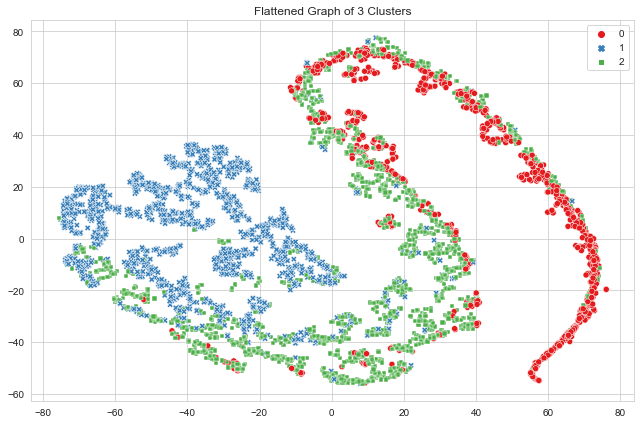

In [34]:
plt.figure(figsize=(9, 6))

df_rfm_k3 = kmeans(df_rfm_normal, 3, df_rfm)
plt.tight_layout()

In [227]:
df_rfm_k3

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12346,326,1,77183.60,2
12347,3,151,3598.21,0
12348,76,31,1797.24,2
12349,19,73,1757.55,2
12350,311,17,334.40,1
...,...,...,...,...
18280,278,10,180.60,1
18281,181,7,80.82,1
18282,8,12,178.05,1


In [228]:
def rfm_values(df):
    '''
    Calcualte average RFM values and size for each cluster

    '''
    df_new = df.groupby(['Cluster']).agg({
        'Recency': 'mean',
        'Frequency': 'mean',
        'MonetaryValue': ['mean', 'count']
    }).round(0)
    
    return df_new

In [229]:
#Summary Stats for KMeans of 3
rfm_values(df_rfm_k3)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          14.0     247.0        6194.0   984
1         162.0      15.0         287.0  1483
2          68.0      63.0        1144.0  1797

<a id='conclusions'></a>
## Conclusions



> Customer segmentation is one of the most important tasks in any business, gaining insights into your customers' purchasing behavior and/or understanding reasons for churn, customer retention, seamless customer experience and bottlenecks to customers' base growth is crucial for all areas concerning that business.

> For business purposes RFM Analysis, “recency, frequency, monetary,” represents some of the most important attributes of a customer from a company’s point of view, to conduct the clustering analysis, collecting the relevant data on each customer and sort customers into groups based on similar values for each of the RFM variables.

> In that Notebook I've represented a public dataset analysis for Customer Segmentation Using K-means and RFM approach, results of the analysis are:
 - The Best clusters using K-means unsupervised machine learning model and Silhouette metric were found to be 3
 - Cluster No 1 has an average spending of > 6000, frequency of purchase about > 240 times and recency of 14 days
 
> Important Note:
 - Code references and inspirations from [Tern Poh Lim's](https://towardsdatascience.com/the-most-important-data-science-tool-for-market-and-customer-segmentation-c9709ca0b64a) Article in Towards Data Science 